# 1.0 IMPORTAÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from statsmodels.stats.diagnostic import lilliefors as lillie

sns.set()

In [2]:
df = pd.read_excel('carbono.xlsx')

In [3]:
df.head()

,CARBONO,HIDROCARBONETO1,BENZENO,HIDROCARBONETO2,OXIDAÇÃO,OZONIO
0,1768.0,195.0,15.47,1359.8,1372.8,1648.4
1,1679.6,145.6,12.22,1241.5,1526.2,1263.6
2,1822.6,114.4,11.70,1220.7,1482.0,1396.2
3,1788.8,104.0,11.96,1232.4,1419.6,1563.9
4,1653.6,66.3,8.45,1086.8,1566.5,1443.0


In [4]:
df.shape

(887, 6)

# 2.0 BOXPLOT

<AxesSubplot:title={'center':'BOXPLOT DOS VALORES DE CARBONO'}, xlabel='CARBONO'>

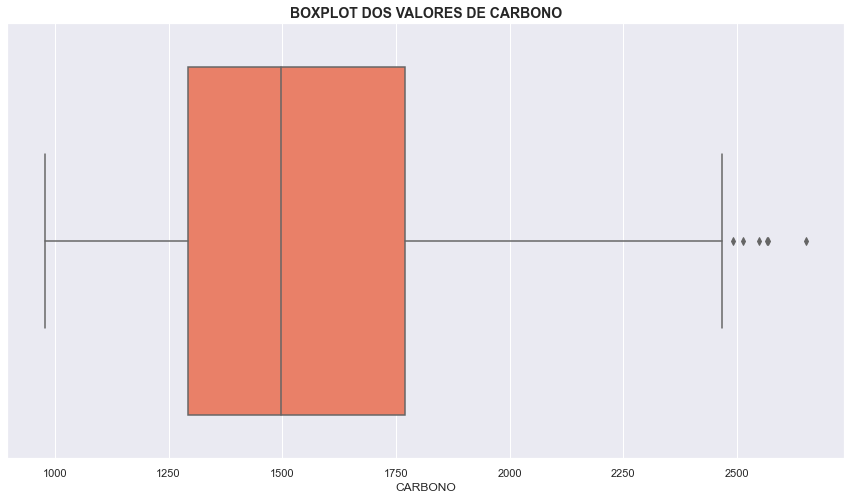

In [5]:
plt.figure(figsize=(15,8))
plt.title('BOXPLOT DOS VALORES DE CARBONO', fontsize=14, fontweight='bold')
sns.boxplot(x='CARBONO', data=df, color='#ff7252')

# 3.0 HISTOGRAMA

Text(0, 0.5, 'FREQUÊNCIA')

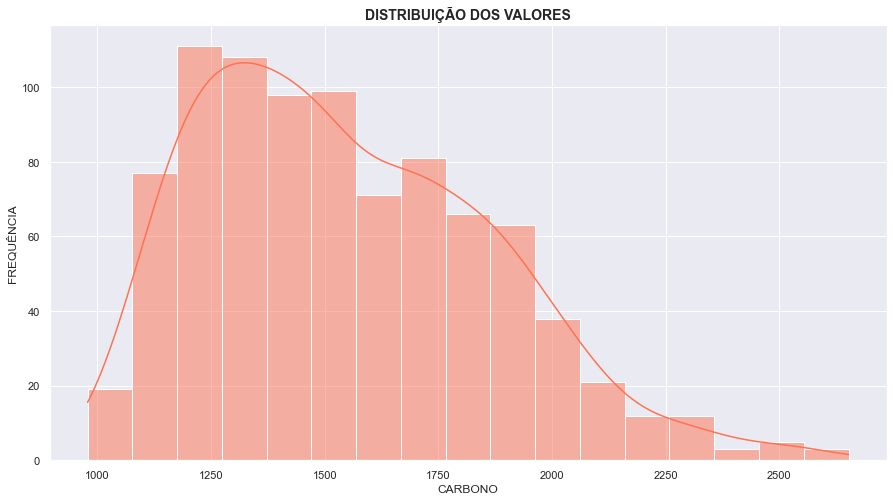

In [6]:
plt.figure(figsize=(15,8))
plt.title('DISTRIBUIÇÃO DOS VALORES', fontsize=14, fontweight='bold')
sns.histplot(x='CARBONO', data=df, kde=True, color='#ff7252')
plt.ylabel('FREQUÊNCIA')

In [7]:
df['CARBONO'].median(), df['CARBONO'].mean()

(1497.6, 1546.7449830890635)

# 4.0 TESTE DE NORMALIDADE

Antes de realizar a análise de correlação, faz-se o teste de normalidade para verificar qual metódo de correlação utilizar, Pearson, Kendall ou Spearman.

Nível de significância de 0,05 ou 5%

- Ho = distribuição normal: p>0.05

- Ha = distribuição não normal: p<=0.05

## 4.1 Shapiro-Wilk

In [8]:
stats.shapiro(df['CARBONO'])[1]

8.634053487357324e-14

## 4.2 Kolmogorov Smirnov

In [9]:
lillie(df['CARBONO'], dist='norm')[1]

0.0009999999999998899

## 4.3 Anderson-Darling 

In [10]:
stats.anderson(df['CARBONO'], 'norm')[1:]

(array([0.573, 0.653, 0.783, 0.914, 1.087]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

## 4.4 QQ Plot

Text(0.5, 1.0, 'NORMAL QQ PLOT')

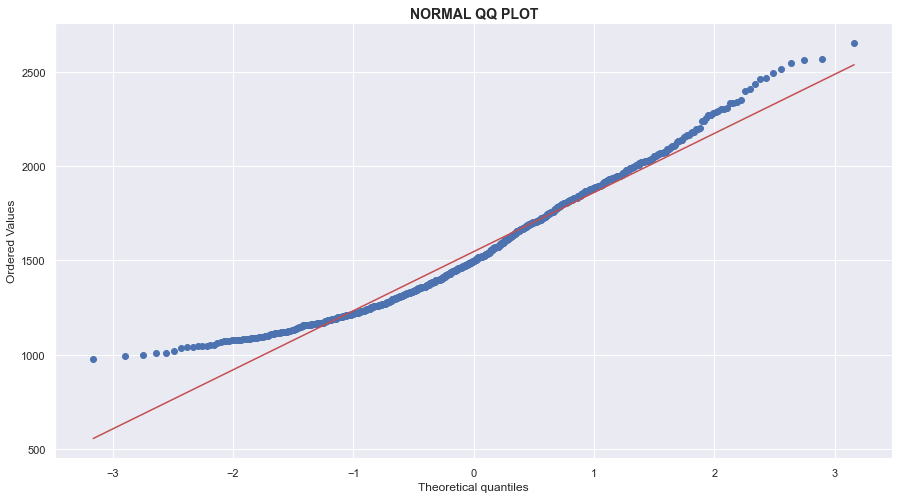

In [11]:
plt.figure(figsize=(15,8))

stats.probplot(df['CARBONO'], dist='norm', plot=plt)
plt.title('NORMAL QQ PLOT', fontsize=14, fontweight='bold')

In [12]:
correlacao = df.corr(method='spearman')
correlacao

,CARBONO,HIDROCARBONETO1,BENZENO,HIDROCARBONETO2,OXIDAÇÃO,OZONIO
CARBONO,1.000000,0.850520,0.939572,0.939718,-0.897814,0.929900
HIDROCARBONETO1,0.850520,1.000000,0.950224,0.950214,-0.950269,0.803892
BENZENO,0.939572,0.950224,1.000000,0.999981,-0.956980,0.898633
HIDROCARBONETO2,0.939718,0.950214,0.999981,1.000000,-0.956997,0.898671
OXIDAÇÃO,-0.897814,-0.950269,-0.956980,-0.956997,1.000000,-0.898698
OZONIO,0.929900,0.803892,0.898633,0.898671,-0.898698,1.000000


<AxesSubplot:title={'center':'HEATMAP DE CORRELAÇÃO'}>

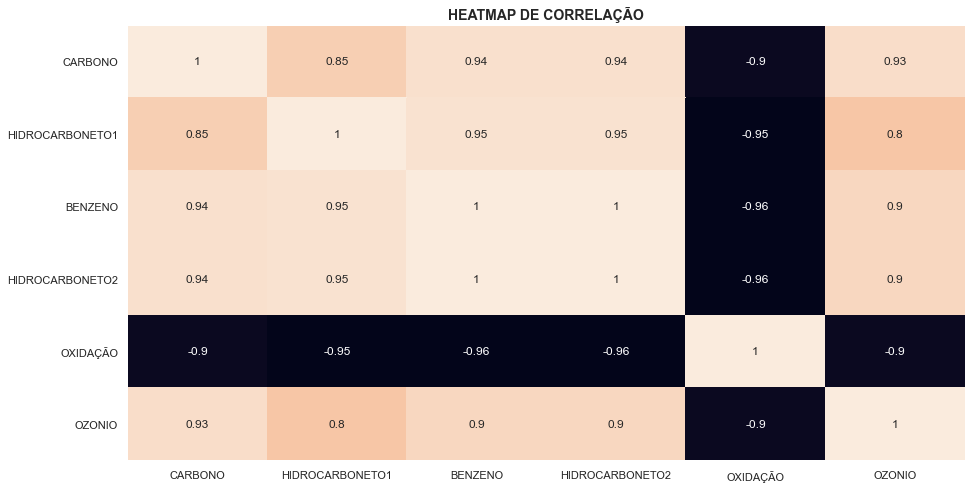

In [13]:
plt.figure(figsize=(15,8))
plt.title('HEATMAP DE CORRELAÇÃO', fontsize=14, fontweight='bold')
sns.heatmap(correlacao, annot=True, cbar=False)

In [14]:
correlacao = df.corr(method='spearman')['CARBONO'].sort_values(ascending=False)
correlacao

CARBONO            1.000000
HIDROCARBONETO2    0.939718
BENZENO            0.939572
OZONIO             0.929900
HIDROCARBONETO1    0.850520
OXIDAÇÃO          -0.897814
Name: CARBONO, dtype: float64

In [15]:
df.columns

Index(['CARBONO', 'HIDROCARBONETO1', 'BENZENO', 'HIDROCARBONETO2', 'OXIDAÇÃO',
       'OZONIO'],
      dtype='object')

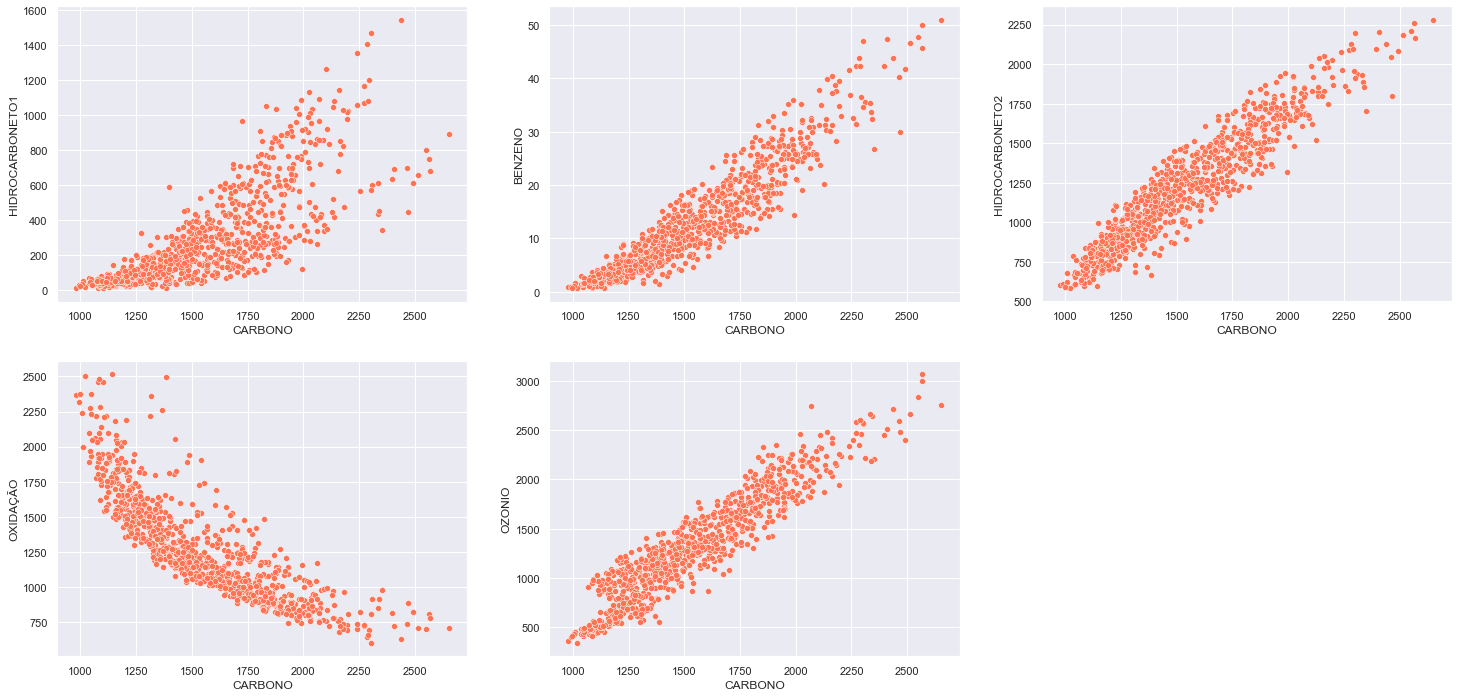

In [17]:
colunas = ['HIDROCARBONETO1', 'BENZENO', 'HIDROCARBONETO2', 'OXIDAÇÃO', 'OZONIO']

plt.figure(figsize=(25,25))

for k in range(len(colunas)):
    
    plt.subplot(4,3, k+1)
    sns.scatterplot(x='CARBONO', y=colunas[k], data=df, color='#ff7252')
    plt.ylabel(colunas[k],fontsize=12)
    plt.xlabel('CARBONO',fontsize=12)
    
plt.show()